## Observations and Insights 

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "../resources/Mouse_metadata.csv"
study_results_path = "../resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_data = pd.merge(mouse_metadata, study_results, on = 'Mouse ID', how = 'left')
# Display the data table for preview
merge_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
num_of_mice = len(merge_data['Mouse ID'].unique())
num_of_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merge_data[merge_data.duplicated(subset = ['Mouse ID', 'Timepoint'], keep = False)]
#Returns Mouse ID g989
#Check if this is the only mouse
duplicate_mice_id = len(duplicate_mice['Mouse ID'].unique())
duplicate_mice_id
#The only duplicate mouse by ID number is g989

1

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merge_data.sort_values('Drug Regimen').drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep = False)
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
333,j119,Capomulin,Female,7,23,25,42.417166,1
296,b742,Capomulin,Male,7,21,30,39.167949,0
295,b742,Capomulin,Male,7,21,25,38.617684,0
294,b742,Capomulin,Male,7,21,20,37.950355,0
293,b742,Capomulin,Male,7,21,15,39.524843,0
...,...,...,...,...,...,...,...,...
645,c264,Zoniferol,Female,11,27,35,61.074795,2
646,c264,Zoniferol,Female,11,27,40,65.708323,2
647,c264,Zoniferol,Female,11,27,45,67.942121,2
1249,n967,Zoniferol,Male,11,27,10,47.471723,1


In [6]:
# Checking the number of mice in the clean DataFrame.
num_of_mice_clean = len(clean_data['Mouse ID'].unique())
num_of_mice_clean

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdev = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_clean_data = pd.DataFrame({'Mean': mean, 'Median': median, 'Variance': variance, 'Std Dev': stdev, 'SEM': sem})

summary_clean_data
# This method is the most straighforward, creating multiple series and putting them all together at the end.



,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdev = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_clean_data = pd.DataFrame({'Mean': mean, 'Median': median, 'Variance': variance, 'Std Dev': stdev, 'SEM': sem})

summary_clean_data
# This method produces everything in a single groupby function


,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

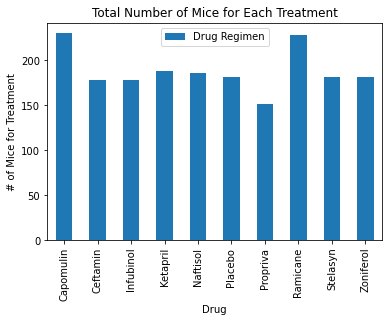

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
drug_regimen = clean_data.groupby('Drug Regimen')
drug_regimen_users = pd.DataFrame(drug_regimen['Drug Regimen'].count())
drug_regimen_chart = drug_regimen_users.plot(kind = 'bar', title = 'Total Number of Mice for Each Treatment')
drug_regimen_chart.set_xlabel('Drug')
drug_regimen_chart.set_ylabel('# of Mice for Treatment')
plt.show()

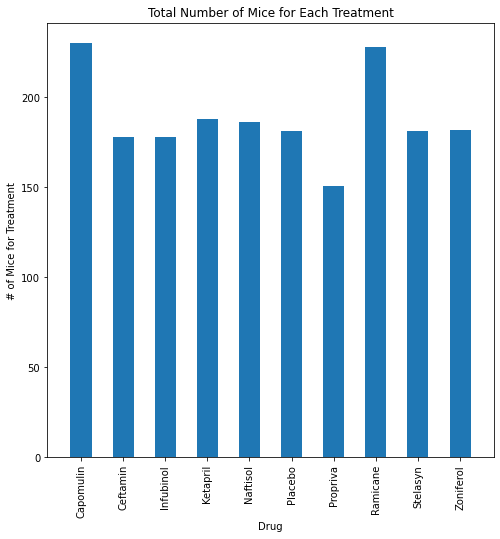

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(drug_regimen_users))
x_locations = [value for value in x_axis]
plt.figure(figsize = (8,8))
plt.bar(x_axis, drug_regimen_users['Drug Regimen'], width = 0.5)
plt.xticks(x_locations, list(drug_regimen_users.index), rotation = 'vertical')
plt.xlim(-.8, len(x_axis)-.2)
plt.ylim(0, max(drug_regimen_users['Drug Regimen'])*1.05)
plt.title("Total Number of Mice for Each Treatment")
plt.xlabel("Drug")
plt.ylabel("# of Mice for Treatment")
column_name = ['Drug Regimen']

plt.show()

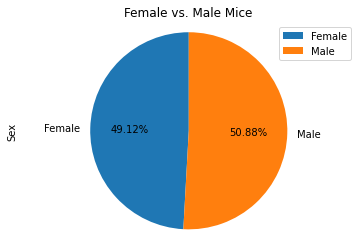

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = clean_data.groupby('Sex')
gender = pd.DataFrame(gender['Sex'].count())
gender.plot(kind = 'pie', y = 'Sex', title = "Female vs. Male Mice", startangle = 90, autopct = '%1.2f%%')

plt.axis('equal')
plt.show()


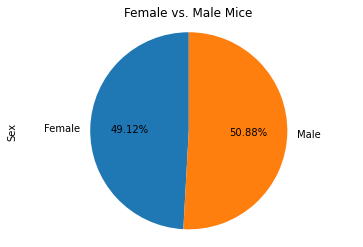

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = list(gender.index.values)
genders_values = gender['Sex']
plt.pie(genders_values, labels = genders, autopct = '%1.2f%%', startangle = 90)
plt.title('Female vs. Male Mice')
plt.ylabel('Sex')
plt.axis('equal')
plt.show()


## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = clean_data.groupby(['Mouse ID'])['Timepoint'].max()
max_tumor = max_tumor.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data = max_tumor.merge(clean_data, on = ['Mouse ID', 'Timepoint'], how='left')

In [34]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    end_tumor_volume = merged_data.loc[merged_data['Drug Regimen']==drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_volume.append(end_tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = end_tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = end_tumor_volume.loc[(end_tumor_volume < lower_bound) | (end_tumor_volume > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


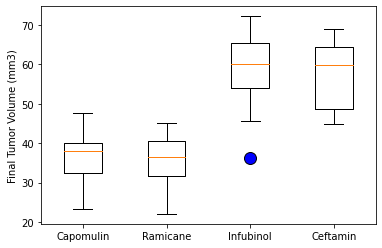

In [35]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_plot = dict(markerfacecolor = 'blue', markersize = 12)
plt.boxplot(tumor_volume, labels = treatments_list, flierprops = box_plot)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

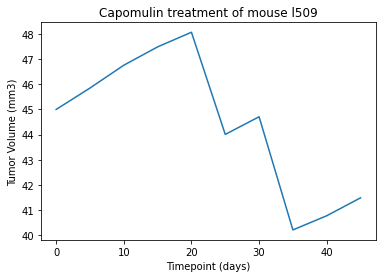

In [41]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_plot = clean_data.loc[clean_data['Drug Regimen']=='Capomulin']
mouse_data = capomulin_plot.loc[capomulin_plot['Mouse ID']=='l509']
plt.plot(mouse_data['Timepoint'],mouse_data['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

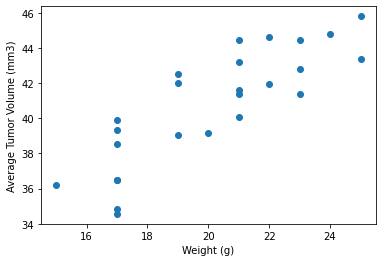

In [42]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_plot = clean_data.loc[clean_data['Drug Regimen'] == "Capomulin"]
capomulin_avg = capomulin_plot.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


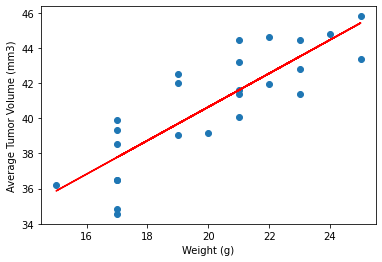

In [43]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")
model = st.linregress(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])

y_values = capomulin_avg['Weight (g)']*model[0]+model[1]
plt.scatter(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
plt.plot(capomulin_avg['Weight (g)'],y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()